## Auto reload

In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## LIB

In [35]:
%reload_ext autoreload

# Basic lib
import pandas as pd
import numpy as np
import os
import sys

# config
import yaml

# Custom lib
from src.loader import Loader
from src.loan_preprocessor import Loan_Preprocessor
from src.log_preprocessor import Log_Preprocessor
from src.user_preprocessor import User_Preprocessor
from src.matcher import Matcher

## Load Config

In [36]:
with open("config.yaml", 'r') as config_file:
    config_dict = yaml.load(config_file, Loader=yaml.FullLoader)

## Load Data

In [37]:
loader_config = config_dict.get('Loader')

In [38]:
loader_config = config_dict.get('Loader')
loader = Loader(loader_config)
loan_df = loader.run('loan_result.csv')
log_df = loader.run('log_data.csv')
user_df = loader.run('user_spec.csv')

## Preprocess

In [53]:
prep_config = config_dict.get('Preprocessor')

# Loan preprocess
loan_preprocessor = Loan_Preprocessor(loan_df, prep_config)
prep_loan_df = loan_preprocessor.run(
    save_file_name='prep_loan.fth',
    save_mode=True
    )

필요 없는 열 삭제 중...
datetime으로 바꾸는 중...
✅ prep dataset saved at (prep\prep_loan.fth)


In [54]:
# Log preprocess
log_preprocessor = Log_Preprocessor(log_df, prep_config)
prep_log_df = log_preprocessor.run(
    save_file_name='prep_log.fth',
    save_mode=True
)

필요 없는 열 삭제 중...
datetime으로 바꾸는 중...
카테고리화 시키는 중...
시간축을 기준으로 정렬 중...
✅ prep dataset saved at (prep\prep_log.fth)


In [55]:
# User preprocess
user_preprocessor = User_Preprocessor(user_df, prep_config)
prep_user_df = user_preprocessor.run(
    save_file_name='prep_user.fth',
    save_mode=True
)

datetime으로 바꾸는 중...
파생변수 생성 중...
카테고리화 시키는 중...
원핫인코딩 중...
순서형인코딩 중...
✅ prep dataset saved at (prep\prep_user.fth)


## Matcher

In [56]:
matcher_config = config_dict.get('Matcher')

In [57]:
matcher_config

{'split_year': 2022, 'split_month': 6, 'split_day': 1}

In [58]:
matcher = Matcher(prep_user_df, prep_loan_df, prep_log_df, matcher_config)

In [59]:
train_valid, test = matcher.run()

Train(Valid)과 Test로 나누는 중...


In [60]:
train_valid.loanapply_insert_time.describe()

C:\Users\TaeYeong\AppData\Local\Temp\ipykernel_16536\2054750052.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train_valid.loanapply_insert_time.describe()


count                10270011
unique                2428082
top       2022-05-10 18:06:33
freq                       61
first     2022-03-01 00:11:36
last      2022-05-31 23:54:38
Name: loanapply_insert_time, dtype: object

In [61]:
test.loanapply_insert_time.describe()

C:\Users\TaeYeong\AppData\Local\Temp\ipykernel_16536\265253425.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  test.loanapply_insert_time.describe()


count                 3257239
unique                 792435
top       2022-06-16 21:45:37
freq                       59
first     2022-06-01 00:12:24
last      2022-06-30 23:55:00
Name: loanapply_insert_time, dtype: object

In [21]:
ml_df = matcher._match()

In [22]:
ml_df.loanapply_insert_time.describe()

C:\Users\TaeYeong\AppData\Local\Temp\ipykernel_16536\1602345302.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ml_df.loanapply_insert_time.describe()


count                10264386
unique                2425396
top       2022-05-10 18:06:33
freq                       61
first     2022-03-01 00:11:36
last      2022-05-31 23:54:38
Name: loanapply_insert_time, dtype: object

## Modeling

In [ ]:
# base line
# model_name : RF, XGB, LGBM, 

## 모델 서치 ##
# from src.models import XGB
# random_state = 42
# xgb = XGB(train_X, train_Y, val_X, val_Y, test_X, test_Y, random_state)
# best_model = xgb.grid_search()

## test 결과 확인 및 모델 해석 ##
# xgb.test_score(best_model)
# xgb.confusion_matrix(best_model)
# xgb.feature_importance(best_model)
# xgb.shap(best_model)


# Clustering

K-Means로 군집화 수행 중...


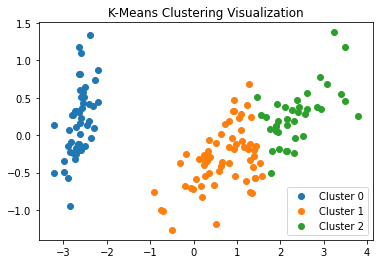

Mean Shift로 군집화 수행 중...


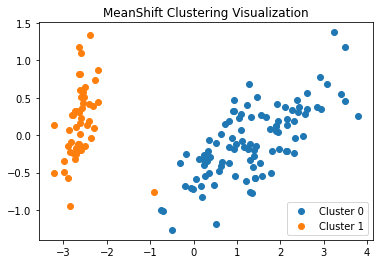

DBSCAN으로 군집화 중...


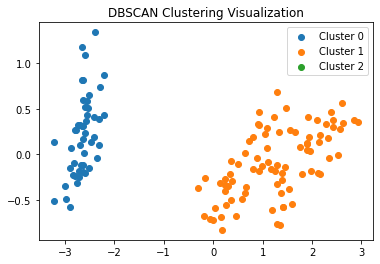

Gaussian Mixture로 군집화 중...


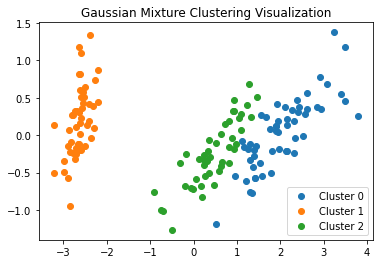

계층적 군집화 중...


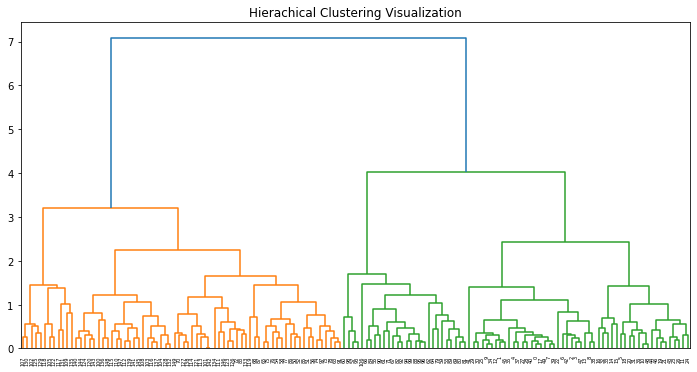

Silhouette Score of KM : 0.55
Silhouette Score of MS : 0.69
Silhouette Score of DB : 0.49
Silhouette Score of GM : 0.50
Silhouette Score of HI : 0.50


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KM,MS,DB,GM,HI
0,5.1,3.5,1.4,0.2,0,1,0,1,4
1,4.9,3.0,1.4,0.2,0,1,0,1,4
2,4.7,3.2,1.3,0.2,0,1,0,1,4
3,4.6,3.1,1.5,0.2,0,1,0,1,4
4,5.0,3.6,1.4,0.2,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,1,0,2
146,6.3,2.5,5.0,1.9,1,0,1,0,2
147,6.5,3.0,5.2,2.0,2,0,1,0,2
148,6.2,3.4,5.4,2.3,2,0,1,0,2


In [18]:
from sklearn.datasets import load_iris
from src.clustering import Clustering

df = load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)

a = Clustering(df)
fin_df = a.run()
fin_df


## Inference

## Evaluation